In [2]:
import pandas as pd
import wrangle as w
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
train, val, test = w.wrangle_glassdoor('../data/glassdoor_reviews.csv')

NameError: name 'cols' is not defined

Possible Questions:

Common words between 3-star companies and 4-star companies?

Review Lengths between 3-star companies and 4-star companies?

Unique words for 3-star companies and 4-star companies?

Number of unique words for 3-star companies and 4-star companies?


### Sentiment

In [37]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [38]:
sia.polarity_scores(train.iloc[2]['cons_lemmatized'] + train.iloc[2]['pros_lemmatized'])

{'neg': 0.14, 'neu': 0.586, 'pos': 0.274, 'compound': 0.9999}

In [39]:
train

,pros,cons,name,rating,ceo_approval,friend_recommendation,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
url,,,,,,,,,,,,
https://www.glassdoor.com/Reviews/Juniper-Networks-Reviews-E7224.htm,"Great work culture, excellent work-life balanc...",engineers paid (i feel) less compared to other...,Juniper Networks,4.3,92.0,86.0,great work culture excellent worklife balance\...,great work culture excellent worklife balance ...,engineers paid i feel less compared to other s...,engineer paid feel le compared software compan...,Four,4
https://www.glassdoor.com/Reviews/Bath-and-Body-Works-Reviews-E13902.htm,Working quickly on the sales floor\nThe compan...,Will stick you behind the cash register once t...,Bath & Body Works,3.8,79.0,70.0,working quickly on the sales floor\nthe compan...,working quickly sale floor company offered gre...,will stick you behind the cash register once t...,stick behind cash register know ' good floor w...,Three,3
https://www.glassdoor.com/Reviews/Stanley-Black-and-Decker-Reviews-E350350.htm,Treats employees well. Good work environment a...,I have no cons to share.\nSomewhat frequent re...,Stanley Black & Decker,3.5,64.0,63.0,treats employees well good work environment an...,treat employee well good work environment room...,i have no cons to share\nsomewhat frequent reo...,con share somewhat frequent reorg change compa...,Three,3
https://www.glassdoor.com/Reviews/Morningstar-Reviews-E3299.htm,"- Coworkers are amicable, and they're overall ...",- Base pay for the area could be slightly high...,Morningstar,4.1,94.0,86.0,coworkers are amicable and they ' re overall v...,coworkers amicable ' overall supportive unlimi...,base pay for the area could be slightly higher...,base pay area could slightly higher bonus prog...,Four,4
https://www.glassdoor.com/Reviews/Chipotle-Reviews-E15228.htm,Everyone there did a great job of being an act...,Constantly greeting people by working on the f...,Chipotle,3.4,56.0,53.0,everyone there did a great job of being an act...,everyone great job actual team constant open c...,constantly greeting people by working on the f...,constantly greeting people working front line ...,Three,3
...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.glassdoor.com/Reviews/NOV-Reviews-E3306.htm,The environment and culture are marvellous and...,Nothing bad to say about the company.\nOccasio...,NOV,3.7,78.0,71.0,the environment and culture are marvellous and...,environment culture marvellous amazing great b...,nothing bad to say about the company\noccasion...,nothing bad say company occasional heavy workl...,Three,3
https://www.glassdoor.com/Reviews/VMware-Reviews-E12830.htm,"Optimistic, innovative environment, smart peop...",There are no cons I have encountered till date...,VMware,4.3,80.0,86.0,optimistic innovative environment smart people...,optimistic innovative environment smart people...,there are no cons i have encountered till date...,con encountered till date decisionmaking slow ...,Four,4
https://www.glassdoor.com/Reviews/Dollar-General-Reviews-E1342.htm,Growth opportunities Company culture Serving o...,Volume of work Urgency expectations Base salar...,Dollar General,2.7,36.0,34.0,growth opportunities company culture serving o...,growth opportunity company culture serving oth...,volume of work urgency expectations base salar...,volume work urgency expectation base salary le...,Two,2


In [22]:
train['pros_sentiment'] = train['pros_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train['cons_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['total_sentiment'] =(train['pros_lemmatized'] + train['cons_lemmatized'])\
                            .apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [24]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .mean()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.999933,0.149378,0.999922
3,0.999955,0.285908,0.999961
4,0.999983,0.666374,0.999989


In [34]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .median()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.9999,0.9946,0.9999
3,1.0000,0.9858,1.0000
4,1.0000,0.9963,1.0000


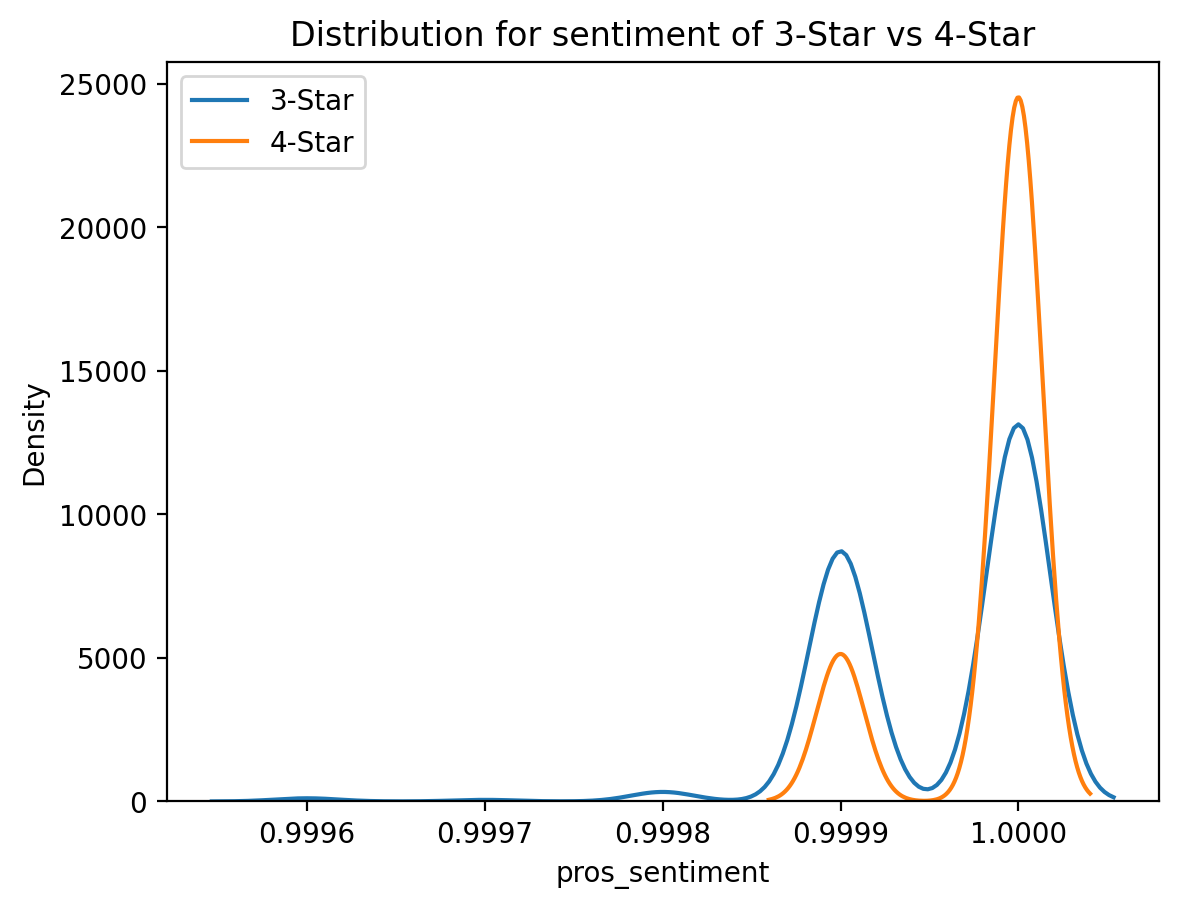

In [28]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['pros_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['pros_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

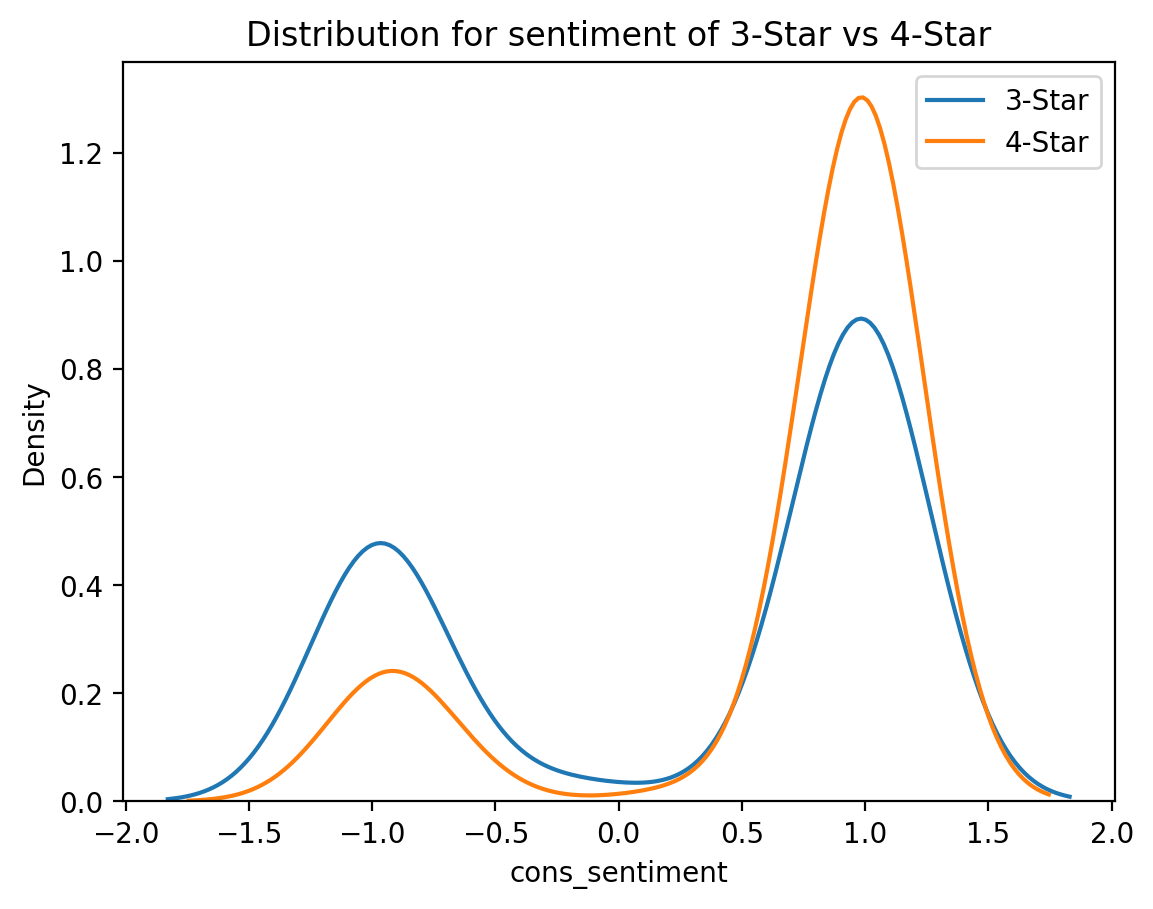

In [29]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['cons_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['cons_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

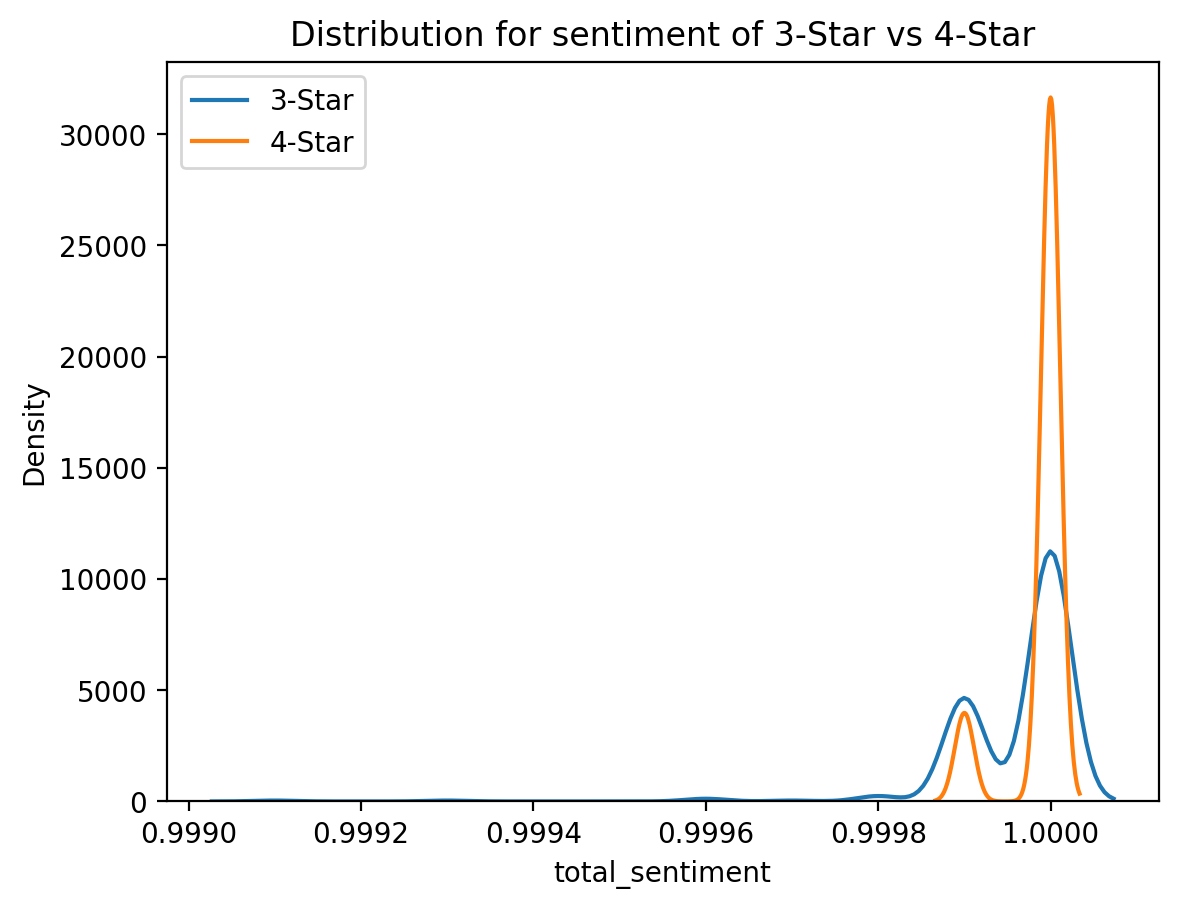

In [30]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['total_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['total_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

How do sentinment scores correlate with ratings?

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


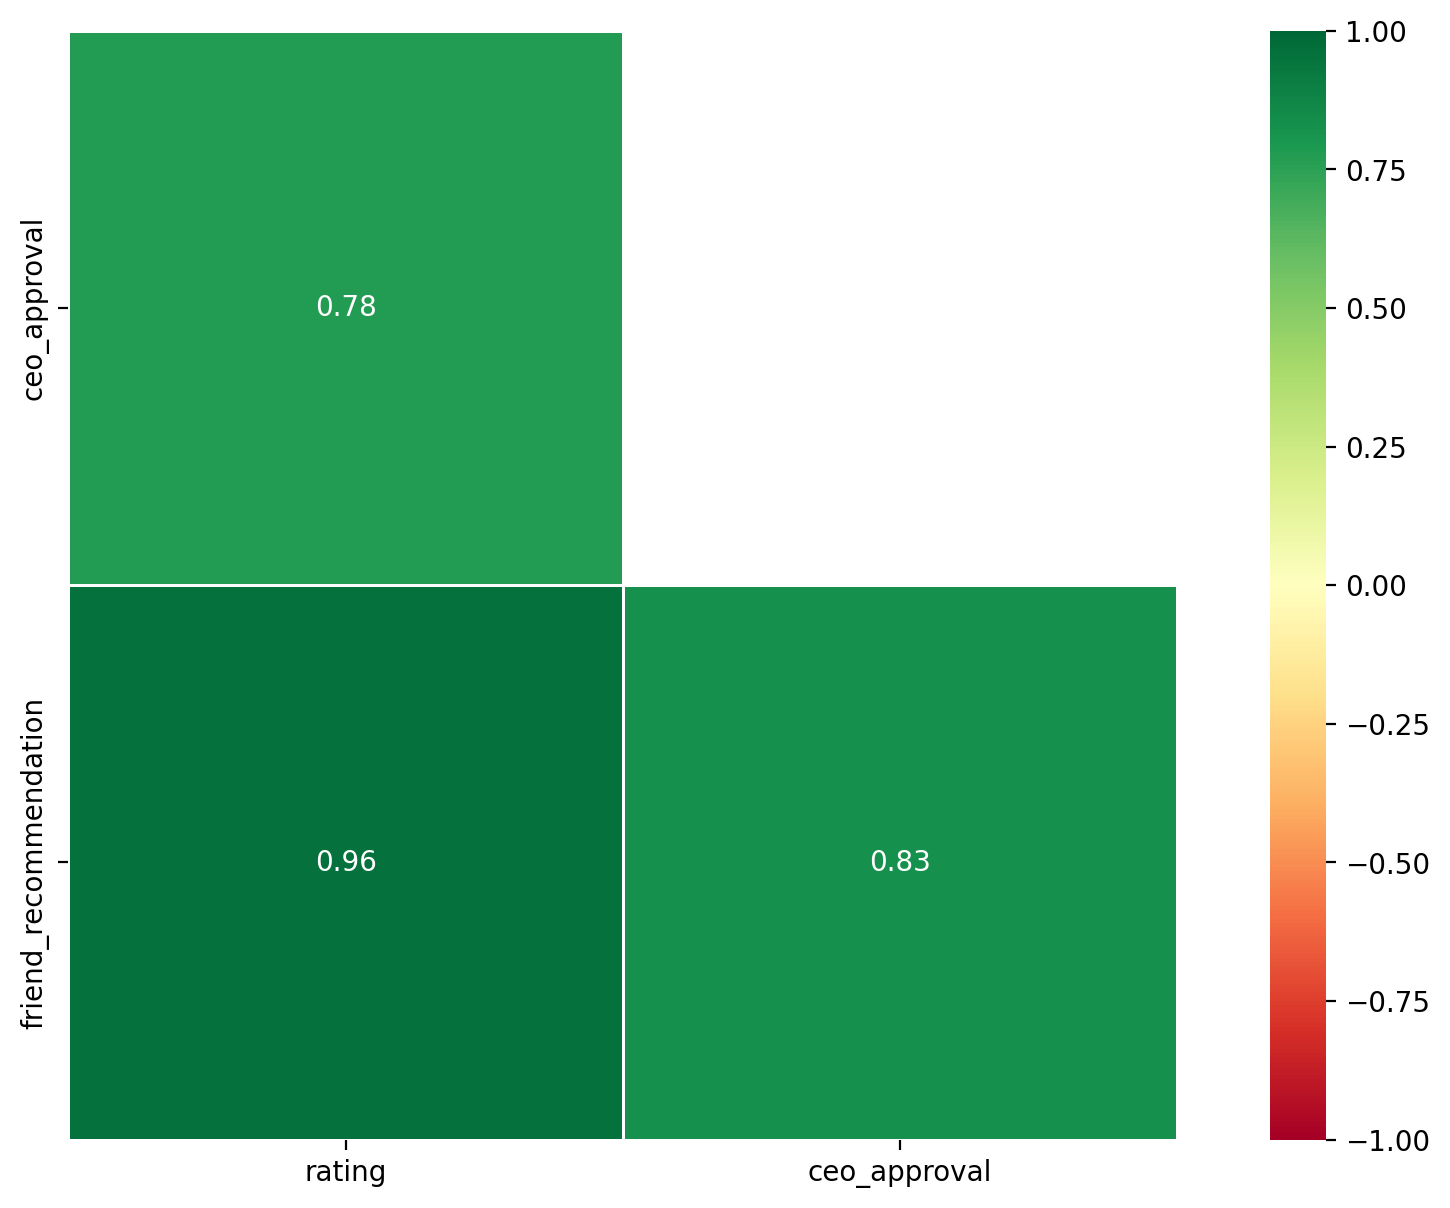

In [40]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.show()

In [42]:
train.groupby('binned_rating_int')['ceo_approval'].mean()

binned_rating_int
2    36.600000
3    69.134211
4    86.675393
Name: ceo_approval, dtype: float64

In [43]:
train.groupby('binned_rating_int')['friend_recommendation'].mean()

binned_rating_int
2    34.800000
3    62.594737
4    81.869110
Name: friend_recommendation, dtype: float64

In [ ]:
def generate_ngrams(text, ):
    words = text.split()
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            trigram = " ".join(words[i:i+3])
            trigrams.append(trigram)

    return trigrams

***Do 3-star companies and 4-star companies***

***Are 4-star companies more likely to be recommended than 3-star companies?***